#### This notebook solves the equations of motion for the IR theory and determines its screening properties

In [2]:
import matplotlib.pyplot as plt
#plt.style.use(['dark_background'])
import dolfin as d
import numpy as np

from phienics.atplmesh import ArcTanPowerLawMesh
from phienics.atexpmesh import ArcTanExpMesh

from phienics.fem import Fem

from phienics.tophatsource import TopHatSource, StepSource
from phienics.cossource import CosSource
from phienics.gcakesource import GCakeSource

from phienics.UV import UVFields, UVSolver

from phienics.gravity import PoissonSolver

from phienics.utils import project, get_values

First define the problem and the mesh. Every parameter not defined here will be set to its default value. You can visualise your mesh using one of the notebooks provided: ATEMesh.ipynb, EMesh.ipynb, QMesh.ipynb

In [3]:
TH_mesh = ArcTanExpMesh( num_cells=250, r_min=0., r_max=1e9, k=20., b=1e-2, 
                     linear_refine=2, linear_start=1.05, linear_stop=1.2, adjust_transition=True )
TH_fem = Fem( TH_mesh, func_degree=5 )

cos_mesh = ArcTanExpMesh( num_cells=250, r_min=0., r_max=1e9, k=1., b=1e-2, 
                     linear_refine=3, linear_start=1.1, linear_stop=1.25 )
cos_fem = Fem( cos_mesh, func_degree=5 )

GK_mesh = ArcTanExpMesh( num_cells=250, r_min=0., r_max=1e9, k=1., b=1e-2, 
                     linear_refine=3, linear_start=1.1, linear_stop=1.3 )
GK_fem = Fem( GK_mesh, func_degree=5 )

In [4]:
Ms, Rs = 1e10, 1e47
TH_source = TopHatSource( TH_fem, Ms=Ms, Rs=Rs, w=0.02 )
cos_source = CosSource( cos_fem, Ms=Ms, Rs=Rs )
GK_source = GCakeSource( GK_fem, Ms=Ms, Rs=Rs )

fields = UVFields( m=1e-48, M=1e-46 )

Generating look-up table, this may take some time...
Generating look-up table, this may take some time...
Calling FFC just-in-time (JIT) compiler, this may take some time.


In [5]:
TH_uvs = UVSolver( TH_fem, TH_source, fields, Mf1=1e13, Mf2=1e12, rel_res_tol=1e-100, abs_res_tol=1e-83, max_iter=50 )
cos_uvs = UVSolver( cos_fem, cos_source, fields, Mf1=1e13, Mf2=1e12, rel_res_tol=1e-100, abs_res_tol=1e-83, max_iter=50 )
GK_uvs = UVSolver( GK_fem, GK_source, fields, Mf1=1e13, Mf2=1e12, rel_res_tol=1e-100, abs_res_tol=1e-83, max_iter=50 )
solvers = [ TH_uvs, cos_uvs, GK_uvs ]




In [6]:
TH_uvs.solve()
cos_uvs.solve()
GK_uvs.solve()

Non-linear solver, iteration 0	abs_du = 1.0e-51	rel_du = 4.3e-01	
abs_res = 4.7e-42 (tol = 1.0e-83)	rel_res = 1.0e+00 (tol = 1.0e-100)
Non-linear solver, iteration 1	abs_du = 6.9e-52	rel_du = 2.9e-01	
abs_res = 1.4e-42 (tol = 1.0e-83)	rel_res = 3.0e-01 (tol = 1.0e-100)
Non-linear solver, iteration 2	abs_du = 4.6e-52	rel_du = 1.9e-01	
abs_res = 4.2e-43 (tol = 1.0e-83)	rel_res = 8.8e-02 (tol = 1.0e-100)
Non-linear solver, iteration 3	abs_du = 3.0e-52	rel_du = 1.3e-01	
abs_res = 1.2e-43 (tol = 1.0e-83)	rel_res = 2.6e-02 (tol = 1.0e-100)
Non-linear solver, iteration 4	abs_du = 2.0e-52	rel_du = 8.5e-02	
abs_res = 3.7e-44 (tol = 1.0e-83)	rel_res = 7.7e-03 (tol = 1.0e-100)
Non-linear solver, iteration 5	abs_du = 1.4e-52	rel_du = 5.7e-02	
abs_res = 1.1e-44 (tol = 1.0e-83)	rel_res = 2.3e-03 (tol = 1.0e-100)
Non-linear solver, iteration 6	abs_du = 9.0e-53	rel_du = 3.8e-02	
abs_res = 3.2e-45 (tol = 1.0e-83)	rel_res = 6.8e-04 (tol = 1.0e-100)
Non-linear solver, iteration 7	abs_du = 6.0e-53	rel_du 

Non-linear solver, iteration 15	abs_du = 3.1e-53	rel_du = 4.5e-03	
abs_res = 1.7e-50 (tol = 1.0e-83)	rel_res = 1.2e-08 (tol = 1.0e-100)
Non-linear solver, iteration 16	abs_du = 3.2e-53	rel_du = 4.7e-03	
abs_res = 5.0e-51 (tol = 1.0e-83)	rel_res = 3.5e-09 (tol = 1.0e-100)
Non-linear solver, iteration 17	abs_du = 3.3e-53	rel_du = 4.7e-03	
abs_res = 1.5e-51 (tol = 1.0e-83)	rel_res = 1.0e-09 (tol = 1.0e-100)
Non-linear solver, iteration 18	abs_du = 3.1e-53	rel_du = 4.5e-03	
abs_res = 4.4e-52 (tol = 1.0e-83)	rel_res = 3.1e-10 (tol = 1.0e-100)
Non-linear solver, iteration 19	abs_du = 1.8e-53	rel_du = 2.6e-03	
abs_res = 1.3e-52 (tol = 1.0e-83)	rel_res = 8.9e-11 (tol = 1.0e-100)
Non-linear solver, iteration 20	abs_du = 3.3e-54	rel_du = 4.7e-04	
abs_res = 3.5e-53 (tol = 1.0e-83)	rel_res = 2.4e-11 (tol = 1.0e-100)
Non-linear solver, iteration 21	abs_du = 1.9e-55	rel_du = 2.7e-05	
abs_res = 8.1e-54 (tol = 1.0e-83)	rel_res = 5.7e-12 (tol = 1.0e-100)
Non-linear solver, iteration 22	abs_du = 1.3e-55

Non-linear solver, iteration 24	abs_du = 4.4e-56	rel_du = 6.4e-06	
abs_res = 1.2e-60 (tol = 1.0e-83)	rel_res = 1.4e-18 (tol = 1.0e-100)
Non-linear solver, iteration 25	abs_du = 5.8e-59	rel_du = 8.6e-09	
abs_res = 6.6e-61 (tol = 1.0e-83)	rel_res = 8.0e-19 (tol = 1.0e-100)
Non-linear solver, iteration 26	abs_du = 4.0e-59	rel_du = 5.9e-09	
abs_res = 5.9e-61 (tol = 1.0e-83)	rel_res = 7.2e-19 (tol = 1.0e-100)
Non-linear solver, iteration 27	abs_du = 3.9e-59	rel_du = 5.8e-09	
abs_res = 4.3e-61 (tol = 1.0e-83)	rel_res = 5.2e-19 (tol = 1.0e-100)
Non-linear solver, iteration 28	abs_du = 4.1e-59	rel_du = 6.1e-09	
abs_res = 8.2e-61 (tol = 1.0e-83)	rel_res = 9.9e-19 (tol = 1.0e-100)
Non-linear solver, iteration 29	abs_du = 7.1e-59	rel_du = 1.0e-08	
abs_res = 7.9e-61 (tol = 1.0e-83)	rel_res = 9.5e-19 (tol = 1.0e-100)
Non-linear solver, iteration 30	abs_du = 5.0e-59	rel_du = 7.4e-09	
abs_res = 8.0e-61 (tol = 1.0e-83)	rel_res = 9.7e-19 (tol = 1.0e-100)
Non-linear solver, iteration 31	abs_du = 5.5e-59

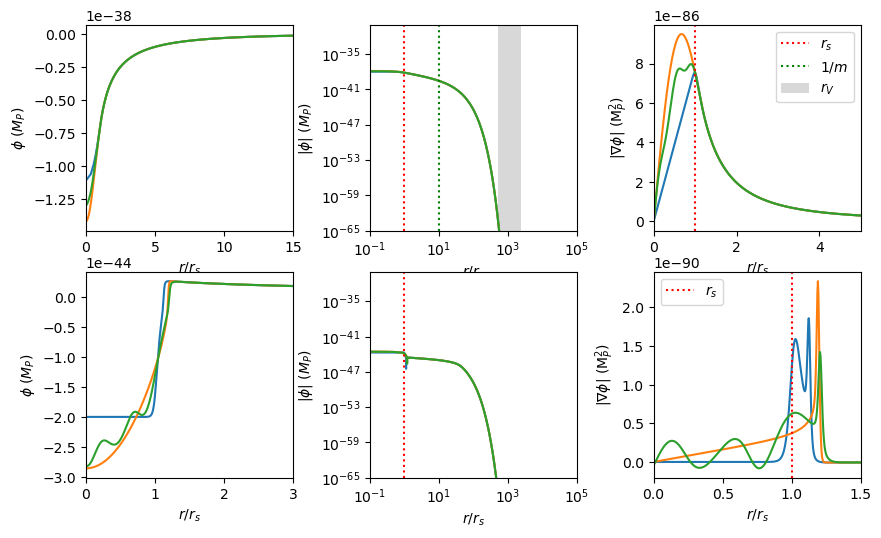

In [7]:
fig=plt.figure(figsize=(10, 6), dpi=100 )

# field around the source
plt.subplot(231)
for i, uvs in enumerate(solvers):
    r_values, Phi_values = get_values( uvs.Phi, output_mesh=True )
    plt.plot( r_values, Phi_values )
plt.ylabel(r'$\phi$ ($M_P$)')
plt.xlabel(r'$r/r_s$')
# plot a vertical line where the transition source-vacuum happens
#plt.axvline(x=uvs.fem.mesh.rs, color='red', linestyle=':')
plt.gca().axvspan( 700, 1000, facecolor='grey', alpha=0.3, label=r'$r_V$')
plt.xlim([ 0., 15. ])

plt.subplot(232)
for i, uvs in enumerate(solvers):
    r_values, Phi_values = get_values( uvs.Phi, output_mesh=True )
    plt.plot( r_values, abs(Phi_values) )
plt.ylabel(r'$|\phi|$ ($M_P$)')
plt.xlabel(r'$r/r_s$')
# plot a vertical line where the transition source-vacuum happens
plt.axvline(x=uvs.fem.mesh.rs, color='red', linestyle=':', label=r'$r_s$')
plt.axvline(x=uvs.Mn / uvs.fields.m, linestyle=':', color='green', label=r'$1/m$')
plt.xscale('log')
plt.yscale('log')
plt.ylim([1e-65, 1e-30])
plt.xlim(1e-1, 1e5)
plt.gca().axvspan( 500, 2400, facecolor='grey', alpha=0.3, label=r'$r_V$')
#plt.legend()

plt.subplot(233)
for i, uvs in enumerate(solvers):
    r_values, grad_Phi_values = get_values( uvs.grad_Phi, output_mesh=True )
    plt.plot( r_values, grad_Phi_values )
plt.axvline(x=uvs.fem.mesh.rs, color='red', linestyle=':', label=r'$r_s$')
plt.axvline(x=1./uvs.fields.m, color='green', linestyle=':', label=r'$1/m$')
plt.gca().axvspan( 500, 2400, facecolor='grey', alpha=0.3, label=r'$r_V$')
plt.ylabel(r'$|\nabla\phi|$ ($\mathrm{M}_P^2$)')
plt.xlabel(r'$r/r_s$')
plt.xlim(0., 5.)
plt.legend()

plt.subplot(234)
for i, uvs in enumerate(solvers):
    r_values, H_values = get_values( uvs.H, output_mesh=True )
    plt.plot( r_values, H_values )
plt.ylabel(r'$\phi$ ($M_P$)')
plt.xlabel(r'$r/r_s$')
# plot a vertical line where the transition source-vacuum happens
#plt.axvline(x=uvs.fem.mesh.rs, color='red', linestyle=':')
plt.xlim([ 0., 3. ])

plt.subplot(235)
for i, uvs in enumerate(solvers):
    r_values, H_values = get_values( uvs.H, output_mesh=True )
    plt.plot( r_values, abs(H_values) )
plt.ylabel(r'$|\phi|$ ($M_P$)')
plt.xlabel(r'$r/r_s$')
# plot a vertical line where the transition source-vacuum happens
plt.axvline(x=uvs.fem.mesh.rs, color='red', linestyle=':', label=r'$r_s$')
#plt.axvline(x=uvs.Mn / uvs.fields.M, linestyle=':', color='black', label=r'$1/M$')
#plt.axvline(x=uvs.Mn/uvs.fields.m, color='green', linestyle=':', label=r'$1/m$')
plt.xscale('log')
plt.yscale('log')
plt.ylim([1e-65, 1e-30])
plt.xlim(1e-1, 1e5)
#plt.legend()

plt.subplot(236)
for i, uvs in enumerate(solvers):
    r_values, grad_H_values = get_values( uvs.grad_H, output_mesh=True )
    plt.plot( r_values, grad_H_values )
plt.axvline(x=uvs.fem.mesh.rs, color='red', linestyle=':', label=r'$r_s$')
plt.ylabel(r'$|\nabla\phi|$ ($\mathrm{M}_P^2$)')
plt.xlabel(r'$r/r_s$')
plt.xlim(0., 1.5)
plt.legend()


plt.subplots_adjust(wspace=0.37)

In [9]:
## for plotting off-docker
#root = './data/Wiggle_'
#sources = [ 'TH_', 'cos_', 'GK_' ]
#for i, uvs in enumerate( solvers ):
#    fileroot = root + sources[i]
#    r_values, Phi_values = get_values( uvs.Phi, output_mesh=True )
#    H_values = get_values( uvs.H )
#    grad_Phi_values = get_values( uvs.grad_Phi )
#    grad_H_values = get_values( uvs.grad_H )
#    np.save( fileroot + 'r_values', r_values )
#    np.save( fileroot + 'Phi_values', Phi_values )
#    np.save( fileroot + 'H_values', H_values )
#    np.save( fileroot + 'grad_Phi_values', grad_Phi_values )
#    np.save( fileroot + 'grad_H_values', grad_H_values )

In [10]:
# now I study the impact of the source width on the wiggles
w_array = np.array([ 7e-3, 1.5e-2, 3e-2, 6e-2 ])
w_solvers = []
lin_ref_extrema = ( ( 1., 1.1 ), ( 1.05, 1.15 ), ( 1.13, 1.2 ), ( 1.2, 1.35 ) )
lin_ref_times = [  3, 2, 2, 2 ]
for i, w in enumerate( w_array ):
    linear_start, linear_stop = lin_ref_extrema[i]
    times = lin_ref_times[i]
    mesh = ArcTanExpMesh( num_cells=250, r_min=0., r_max=1e9, k=20., b=1e-2, 
                     linear_refine=2, linear_start=linear_start, 
                    linear_stop=linear_stop, adjust_transition=True )
    fem = Fem( mesh, func_degree=5 )
    source = TopHatSource( fem, Ms=Ms, Rs=Rs, w=w )
    uvs = UVSolver( fem, source, fields, Mf1=1e13, Mf2=1e12, rel_res_tol=1e-100,
                   abs_res_tol=-100, max_iter=50 )
    uvs.solve()
    w_solvers.append( uvs ) 

Non-linear solver, iteration 0	abs_du = 1.4e-51	rel_du = 5.0e-01	
abs_res = 4.3e-42 (tol = -1.0e+02)	rel_res = 1.0e+00 (tol = 1.0e-100)
Non-linear solver, iteration 1	abs_du = 9.7e-52	rel_du = 3.3e-01	
abs_res = 1.3e-42 (tol = -1.0e+02)	rel_res = 3.0e-01 (tol = 1.0e-100)
Non-linear solver, iteration 2	abs_du = 6.4e-52	rel_du = 2.2e-01	
abs_res = 3.8e-43 (tol = -1.0e+02)	rel_res = 8.8e-02 (tol = 1.0e-100)
Non-linear solver, iteration 3	abs_du = 4.3e-52	rel_du = 1.5e-01	
abs_res = 1.1e-43 (tol = -1.0e+02)	rel_res = 2.6e-02 (tol = 1.0e-100)
Non-linear solver, iteration 4	abs_du = 2.9e-52	rel_du = 9.9e-02	
abs_res = 3.3e-44 (tol = -1.0e+02)	rel_res = 7.7e-03 (tol = 1.0e-100)
Non-linear solver, iteration 5	abs_du = 1.9e-52	rel_du = 6.6e-02	
abs_res = 9.9e-45 (tol = -1.0e+02)	rel_res = 2.3e-03 (tol = 1.0e-100)
Non-linear solver, iteration 6	abs_du = 1.3e-52	rel_du = 4.4e-02	
abs_res = 2.9e-45 (tol = -1.0e+02)	rel_res = 6.8e-04 (tol = 1.0e-100)
Non-linear solver, iteration 7	abs_du = 8.5e-53	

Non-linear solver, iteration 14	abs_du = 3.1e-53	rel_du = 1.3e-02	
abs_res = 1.8e-49 (tol = -1.0e+02)	rel_res = 4.0e-08 (tol = 1.0e-100)
Non-linear solver, iteration 15	abs_du = 3.1e-53	rel_du = 1.3e-02	
abs_res = 5.4e-50 (tol = -1.0e+02)	rel_res = 1.2e-08 (tol = 1.0e-100)
Non-linear solver, iteration 16	abs_du = 3.1e-53	rel_du = 1.3e-02	
abs_res = 1.6e-50 (tol = -1.0e+02)	rel_res = 3.5e-09 (tol = 1.0e-100)
Non-linear solver, iteration 17	abs_du = 3.1e-53	rel_du = 1.3e-02	
abs_res = 4.7e-51 (tol = -1.0e+02)	rel_res = 1.0e-09 (tol = 1.0e-100)
Non-linear solver, iteration 18	abs_du = 3.2e-53	rel_du = 1.4e-02	
abs_res = 1.3e-51 (tol = -1.0e+02)	rel_res = 3.0e-10 (tol = 1.0e-100)
Non-linear solver, iteration 19	abs_du = 3.3e-53	rel_du = 1.4e-02	
abs_res = 3.6e-52 (tol = -1.0e+02)	rel_res = 8.0e-11 (tol = 1.0e-100)
Non-linear solver, iteration 20	abs_du = 3.4e-53	rel_du = 1.4e-02	
abs_res = 7.7e-53 (tol = -1.0e+02)	rel_res = 1.7e-11 (tol = 1.0e-100)
Non-linear solver, iteration 21	abs_du = 

Non-linear solver, iteration 24	abs_du = 6.3e-58	rel_du = 2.5e-07	
abs_res = 1.0e-59 (tol = -1.0e+02)	rel_res = 1.9e-18 (tol = 1.0e-100)
Non-linear solver, iteration 25	abs_du = 6.6e-58	rel_du = 2.7e-07	
abs_res = 4.6e-60 (tol = -1.0e+02)	rel_res = 8.4e-19 (tol = 1.0e-100)
Non-linear solver, iteration 26	abs_du = 9.2e-58	rel_du = 3.7e-07	
abs_res = 1.1e-59 (tol = -1.0e+02)	rel_res = 2.1e-18 (tol = 1.0e-100)
Non-linear solver, iteration 27	abs_du = 2.3e-58	rel_du = 9.4e-08	
abs_res = 6.6e-60 (tol = -1.0e+02)	rel_res = 1.2e-18 (tol = 1.0e-100)
Non-linear solver, iteration 28	abs_du = 9.9e-58	rel_du = 4.0e-07	
abs_res = 3.0e-60 (tol = -1.0e+02)	rel_res = 5.6e-19 (tol = 1.0e-100)
Non-linear solver, iteration 29	abs_du = 9.5e-58	rel_du = 3.8e-07	
abs_res = 6.4e-60 (tol = -1.0e+02)	rel_res = 1.2e-18 (tol = 1.0e-100)
Non-linear solver, iteration 30	abs_du = 8.2e-58	rel_du = 3.3e-07	
abs_res = 1.4e-60 (tol = -1.0e+02)	rel_res = 2.6e-19 (tol = 1.0e-100)
Non-linear solver, iteration 31	abs_du = 

Non-linear solver, iteration 33	abs_du = 6.6e-59	rel_du = 2.1e-08	
abs_res = 8.8e-61 (tol = -1.0e+02)	rel_res = 8.9e-20 (tol = 1.0e-100)
Non-linear solver, iteration 34	abs_du = 5.2e-59	rel_du = 1.7e-08	
abs_res = 4.2e-61 (tol = -1.0e+02)	rel_res = 4.3e-20 (tol = 1.0e-100)
Non-linear solver, iteration 35	abs_du = 4.8e-59	rel_du = 1.6e-08	
abs_res = 8.3e-61 (tol = -1.0e+02)	rel_res = 8.3e-20 (tol = 1.0e-100)
Non-linear solver, iteration 36	abs_du = 4.3e-59	rel_du = 1.4e-08	
abs_res = 5.8e-61 (tol = -1.0e+02)	rel_res = 5.9e-20 (tol = 1.0e-100)
Non-linear solver, iteration 37	abs_du = 5.8e-59	rel_du = 1.9e-08	
abs_res = 7.0e-61 (tol = -1.0e+02)	rel_res = 7.0e-20 (tol = 1.0e-100)
Non-linear solver, iteration 38	abs_du = 4.6e-59	rel_du = 1.5e-08	
abs_res = 8.5e-61 (tol = -1.0e+02)	rel_res = 8.6e-20 (tol = 1.0e-100)
Non-linear solver, iteration 39	abs_du = 6.7e-59	rel_du = 2.2e-08	
abs_res = 1.1e-60 (tol = -1.0e+02)	rel_res = 1.2e-19 (tol = 1.0e-100)
Non-linear solver, iteration 40	abs_du = 

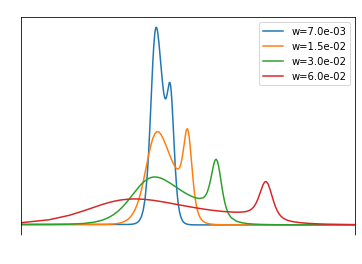

In [11]:
plt.rcParams['xtick.labelsize']=15
plt.rcParams.update()
for i, uvs in enumerate( w_solvers ):
    r_values, grad_H_values = get_values( uvs.grad_H, output_mesh=True )
#    plt.plot( r_values, grad_H_values, '.', markersize='3', label='w=%.1e' % w_array[i] )
    plt.plot( r_values, grad_H_values, label='w=%.1e' % w_array[i] )

plt.xlim(0.7,1.5)
plt.gca().spines['bottom'].set_color('white')
plt.gca().tick_params(axis='x', colors='white')
plt.gca().tick_params(axis='y', colors='white')
plt.legend()

In [12]:
# for plotting off-docker
#for i, uvs in enumerate( w_solvers ):
#    root = './data/w=%2.1e_' % w_array[i]
#    r_values, grad_H_values = get_values( uvs.grad_H, output_mesh=True )
#    np.save( root + 'r_values', r_values )
#    np.save( root + 'grad_H_values', grad_H_values )